# Поиск корня уравнения методом половинного деления
# Root Finding by Bisection Method

**Курс:** Вычислительная математика для биологии и медицины  
**Course:** Computational Mathematics for Biology and Medicine

---

## Описание / Description

В этом блокноте мы реализуем метод половинного деления для поиска корня уравнения $f(x) = 0$ и визуализируем процесс сходимости с помощью интерактивного графика.

In this notebook we implement the bisection method for finding the root of equation $f(x) = 0$ and visualize the convergence process using an interactive graph.

In [3]:
# ============================================================================
# Ячейка 1: Подготовка окружения / Environment Setup
# ============================================================================

# Установка пакетов (раскомментировать при первом запуске)
# Install packages (uncomment on first run)
# using Pkg
# Pkg.add("Plots")
# Pkg.add("DataFrames")
# Pkg.add("Interact")
# Pkg.add("Roots")
# Pkg.add("Printf")

# Загрузка пакетов / Load packages
using Plots
using DataFrames
using Interact
using Roots
using Printf

# Настройка графического бэкенда для Jupyter
# Set up plotting backend for Jupyter
gr()  # или plotly() для интерактивности / or plotly() for interactivity

println("Пакеты загружены успешно / Packages loaded successfully")

Пакеты загружены успешно / Packages loaded successfully


## 1. Теоретические основы / Theoretical Foundations

### Метод половинного деления / Bisection Method

**Условие / Condition:**
Если $f(x)$ непрерывна на $[a, b]$ и $f(a) \cdot f(b) < 0$, то корень существует.

If $f(x)$ is continuous on $[a, b]$ and $f(a) \cdot f(b) < 0$, then a root exists.

**Алгоритм / Algorithm:**

1. Вычислить середину / Calculate midpoint: $c = \frac{a + b}{2}$

2. Проверить знак / Check sign:
   - Если $f(a) \cdot f(c) < 0$ → корень в $[a, c]$ / root in $[a, c]$
   - Иначе / Otherwise → корень в $[c, b]$ / root in $[c, b]$

3. Повторять до $|b - a| < \varepsilon$ / Repeat until $|b - a| < \varepsilon$

**Оценка погрешности / Error Estimate:**

$$|x_n - x^*| \leq \frac{b - a}{2^{n+1}}$$

In [4]:
# ============================================================================
# Ячейка 2: Тестовая функция и параметры / Test Function and Parameters
# ============================================================================

# Тестовая функция: модель концентрации лекарства
# Test function: drug concentration model
f(x) = exp(-0.3 * x) * sin(x) - 0.1

# Начальный интервал / Initial interval
a₀ = 0.5
b₀ = 3.5

# Точность / Precision
ε = 1e-6

# Максимальное число итераций / Maximum iterations
max_iter = 50

# Вычисление "истинного" корня для сравнения
# Calculate "true" root for comparison
true_root = find_zero(f, (a₀, b₀))

println("=" ^ 60)
println("ПАРАМЕТРЫ / PARAMETERS")
println("=" ^ 60)
println(@sprintf("Функция / Function: f(x) = exp(-0.3x)·sin(x) - 0.1"))
println(@sprintf("Начальный интервал / Initial interval: [%.2f, %.2f]", a₀, b₀))
println(@sprintf("Точность / Precision: ε = %.2e", ε))
println(@sprintf("Истинный корень / True root: %.10f", true_root))
println("=" ^ 60)

# Быстрая проверка условия существования корня
# Quick check of root existence condition
fa, fb = f(a₀), f(b₀)
println(@sprintf("f(a) = %.6f, f(b) = %.6f", fa, fb))
println(@sprintf("f(a)·f(b) = %.6f %s", fa*fb, fa*fb < 0 ? "✓ (корень существует)" : "✗ (корень не гарантирован)"))

ПАРАМЕТРЫ / PARAMETERS
Функция / Function: f(x) = exp(-0.3x)·sin(x) - 0.1
Начальный интервал / Initial interval: [0.50, 3.50]
Точность / Precision: ε = 1.00e-06
Истинный корень / True root: 2.9005354163
f(a) = 0.312645, f(b) = -0.222752
f(a)·f(b) = -0.069642 ✓ (корень существует)


In [5]:
# ============================================================================
# Ячейка 3: Реализация метода половинного деления
# Bisection Method Implementation
# ============================================================================

"""
    bisection_full(f, a, b, ε, max_iter, true_root)
    
Полная реализация метода с сохранением истории итераций.
Full implementation with iteration history preservation.

# Аргументы / Arguments:
- `f`: функция / function
- `a`, `b`: границы интервала / interval bounds
- `ε`: точность / precision
- `max_iter`: максимальное число итераций / max iterations
- `true_root`: истинный корень для расчёта погрешности / true root for error calculation

# Возвращает / Returns:
- DataFrame с историей итераций / DataFrame with iteration history
"""
function bisection_full(f, a, b, ε, max_iter, true_root)
    # Инициализация DataFrame для истории
    # Initialize DataFrame for history
    history = DataFrame(
        Iteration = Int[],
        a = Float64[],
        b = Float64[],
        c = Float64[],
        f_c = Float64[],
        Interval_Length = Float64[],
        Error = Float64[]
    )
    
    fa, fb = f(a), f(b)
    
    # Проверка условия существования корня
    # Check root existence condition
    if fa * fb > 0
        error("Корень не гарантирован: f(a) и f(b) одного знака / Root not guaranteed: f(a) and f(b) have same sign")
    end
    
    a_curr, b_curr = a, b
    
    for i in 1:max_iter
        # Вычисление середины / Calculate midpoint
        c = (a_curr + b_curr) / 2
        fc = f(c)
        
        # Длина интервала и погрешность
        # Interval length and error
        interval_len = b_curr - a_curr
        err = abs(c - true_root)
        
        # Запись в историю / Record to history
        push!(history, (i, a_curr, b_curr, c, fc, interval_len, err))
        
        # Проверка условия остановки
        # Check stopping condition
        if interval_len < ε || abs(fc) < ε
            println(@sprintf("\nСходимость достигнута на итерации %d", i))
            println(@sprintf("Convergence achieved at iteration %d", i))
            break
        end
        
        # Выбор нового интервала / Select new interval
        if fa * fc < 0
            b_curr = c
            fb = fc
        else
            a_curr = c
            fa = fc
        end
    end
    
    return history
end

# Запуск метода / Run the method
println("\nЗапуск метода половинного деления...")
println("Running bisection method...")
history = bisection_full(f, a₀, b₀, ε, max_iter, true_root)

# Вывод результатов / Display results
println("\n" * "=" ^ 60)
println("РЕЗУЛЬТАТЫ / RESULTS")
println("=" ^ 60)
println(@sprintf("Число итераций / Number of iterations: %d", nrow(history)))
println(@sprintf("Приближённый корень / Approximate root: %.10f", history.c[end]))
println(@sprintf("Истинный корень / True root: %.10f", true_root))
println(@sprintf("Абсолютная погрешность / Absolute error: %.2e", history.Error[end]))
println(@sprintf("Длина последнего интервала / Final interval length: %.2e", history.Interval_Length[end]))
println("=" ^ 60)

# Показать первые 10 итераций / Show first 10 iterations
println("\nПервые 10 итераций / First 10 iterations:")
display(first(history, min(10, nrow(history))))


Запуск метода половинного деления...
Running bisection method...

Сходимость достигнута на итерации 17
Convergence achieved at iteration 17

РЕЗУЛЬТАТЫ / RESULTS
Число итераций / Number of iterations: 17
Приближённый корень / Approximate root: 2.9005355835
Истинный корень / True root: 2.9005354163
Абсолютная погрешность / Absolute error: 1.67e-07
Длина последнего интервала / Final interval length: 4.58e-05

Первые 10 итераций / First 10 iterations:


Row,Iteration,a,b,c,f_c,Interval_Length,Error
,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.5,3.5,2.0,0.399033,3.0,0.900535
2,2,2.0,3.5,2.75,0.0672572,1.5,0.150535
3,3,2.75,3.5,3.125,-0.0935025,0.75,0.224465
4,4,2.75,3.125,2.9375,-0.0160373,0.375,0.0369646
5,5,2.75,2.9375,2.84375,0.0250372,0.1875,0.0567854
6,6,2.84375,2.9375,2.89062,0.00433605,0.09375,0.00991042
7,7,2.89062,2.9375,2.91406,-0.0058941,0.046875,0.0135271
8,8,2.89062,2.91406,2.90234,-0.00078958,0.0234375,0.00180833
9,9,2.89062,2.90234,2.89648,0.00177064,0.0117188,0.00405104


In [6]:
# ============================================================================
# Ячейка 4: Функция визуализации / Visualization Function
# ============================================================================

"""
    plot_bisection_step(history, step, a₀, b₀, true_root, f)
    
Построение графика для конкретной итерации.
Plot graph for specific iteration.

# Аргументы / Arguments:
- `history`: DataFrame с историей / DataFrame with history
- `step`: номер итерации / iteration number
- `a₀`, `b₀`: исходные границы / original bounds
- `true_root`: истинный корень / true root
- `f`: функция / function

# Возвращает / Returns:
- Plot object
"""
function plot_bisection_step(history, step, a₀, b₀, true_root, f)
    # Проверка номера итерации
    # Check iteration number
    if step > nrow(history)
        step = nrow(history)
    end
    
    row = history[step, :]
    
    # Диапазон для графика функции
    # Range for function plot
    x_range = range(a₀ - 0.5, b₀ + 0.5, length=500)
    y_range = f.(x_range)
    y_min, y_max = minimum(y_range), maximum(y_range)
    
    # Создание графика
    # Create plot
    p = plot(x_range, y_range,
             label="f(x)",
             linewidth=2,
             color=:blue,
             xlabel="x",
             ylabel="f(x)",
             title=@sprintf("Метод половинного деления - Итерация %d\nBisection Method - Iteration %d", step, step),
             size=(900, 600),
             legend=:topright,
             grid=true,
             gridalpha=0.3)
    
    # Линия y = 0
    # y = 0 line
    plot!(x_range, zeros(length(x_range)),
          linestyle=:dash,
          color=:black,
          linewidth=1,
          label="y = 0")
    
    # Заполненная область текущего интервала [a, b]
    # Filled area of current interval [a, b]
    plot!([row.a, row.b, row.b, row.a],
          [y_min, y_min, y_max, y_max],
          fillalpha=0.2,
          color=:green,
          label="Интервал поиска / Search Interval",
          linewidth=0)
    
    # Границы интервала a и b
    # Interval bounds a and b
    plot!([row.a, row.a], [y_min, f(row.a)],
          color=:green,
          linewidth=2,
          label="a = " * @sprintf("%.4f", row.a))
    plot!([row.b, row.b], [y_min, f(row.b)],
          color=:green,
          linewidth=2,
          label="b = " * @sprintf("%.4f", row.b))
    
    # Текущее приближение c
    # Current approximation c
    scatter!([row.c], [row.f_c],
             color=:red,
             markersize=10,
             label="c = " * @sprintf("%.4f", row.c),
             marker=:circle)
    
    # Вертикальная линия от c до оси x
    # Vertical line from c to x-axis
    plot!([row.c, row.c], [0, row.f_c],
          color=:red,
          linestyle=:dash,
          linewidth=1,
          label="")
    
    # Истинный корень для сравнения
    # True root for comparison
    scatter!([true_root], [0],
             color=:orange,
             markersize=12,
             label="Истинный корень / True Root",
             marker=:star5)
    
    # Аннотация с информацией о погрешности
    # Annotation with error information
    annotate!(0.05, 0.95,
              text(@sprintf("Длина интервала: %.6f\nПогрешность: %.6f",
                           row.Interval_Length, row.Error),
                   :left, 10, :black),
              subplot=1)
    
    return p
end

println("Функция визуализации готова / Visualization function ready")

Функция визуализации готова / Visualization function ready


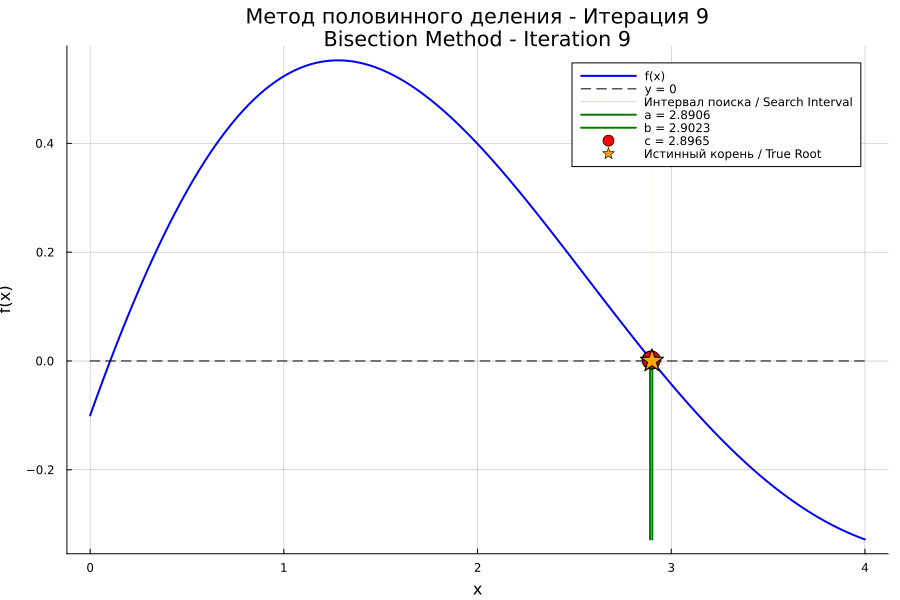

(div
  Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["iteration"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 17, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable(9), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Александр\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Александр\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Александр\\.julia\\packages\\InteractBase\\8TTmI\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Александр\\.julia\\packages\\InteractBase\\8TTmI\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Александр\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition(ReentrantLock())), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"11023122276471649767\",\"id\":\"27\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"11023122276471649767\",\"id\":\"26\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n 

In [16]:
# ============================================================================
# Ячейка 5: Интерактивный виджет для Jupyter
# Interactive Widget for Jupyter
# ============================================================================

using WebIO
# Создание ползунка для выбора итерации
# Create slider for iteration selection
@manipulate for iteration in 1:nrow(history)
    display(plot_bisection_step(history, iteration, a₀, b₀, true_root, f))
end

## 2. Анализ сходимости / Convergence Analysis

### График уменьшения погрешности / Error Decrease Plot

На графике ниже показано, как уменьшается длина интервала и абсолютная погрешность с каждой итерацией. Обратите внимание на логарифмическую шкалу по оси Y.

The plot below shows how the interval length and absolute error decrease with each iteration. Note the logarithmic scale on the Y-axis.

**Ожидаемая скорость сходимости / Expected Convergence Rate:**

Метод половинного деления имеет линейную сходимость:
Bisection method has linear convergence:

$$\text{Error}_{n+1} \approx \frac{1}{2} \text{Error}_n$$

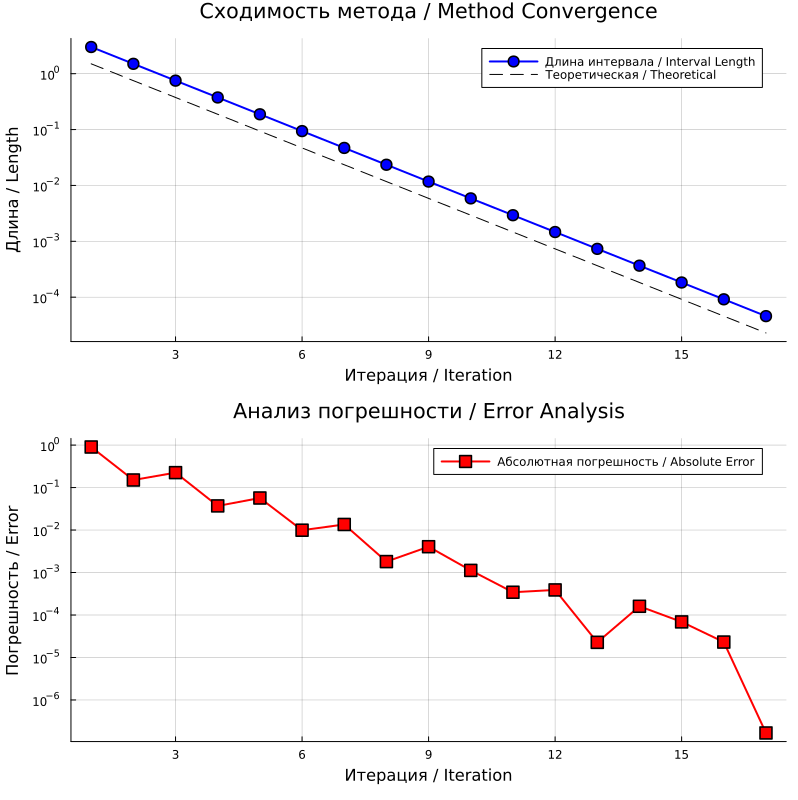

In [14]:
# ============================================================================
# Ячейка 6: График сходимости / Convergence Plot
# ============================================================================

"""
    plot_convergence(history, a₀, b₀)
    
Построение графика сходимости метода.
Plot method convergence graph.
"""
function plot_convergence(history, a₀, b₀)
    # График 1: Длина интервала
    # Plot 1: Interval length
    p1 = plot(history.Iteration, history.Interval_Length,
              marker=:circle,
              markersize=6,
              linewidth=2,
              color=:blue,
              label="Длина интервала / Interval Length",
              xlabel="Итерация / Iteration",
              ylabel="Длина / Length",
              title="Сходимость метода / Method Convergence",
              size=(800, 400),
              yaxis=:log,
              grid=true,
              gridalpha=0.3)
    
    # Теоретическая оценка
    # Theoretical estimate
    theoretical = [(b₀ - a₀) / 2^(i) for i in history.Iteration]
    plot!(p1, history.Iteration, theoretical,
          linestyle=:dash,
          color=:black,
          linewidth=1,
          label="Теоретическая / Theoretical")
    
    # График 2: Абсолютная погрешность
    # Plot 2: Absolute error
    p2 = plot(history.Iteration, history.Error,
              marker=:square,
              markersize=6,
              linewidth=2,
              color=:red,
              label="Абсолютная погрешность / Absolute Error",
              xlabel="Итерация / Iteration",
              ylabel="Погрешность / Error",
              title="Анализ погрешности / Error Analysis",
              size=(800, 400),
              yaxis=:log,
              grid=true,
              gridalpha=0.3)
    
    # Объединение графиков
    # Combine plots
    plot(p1, p2, layout=(2, 1), size=(800, 800))
end

# Построение графика сходимости
# Plot convergence graph
plot_convergence(history, a₀, b₀)

## 3. Выводы / Conclusions

| Критерий / Criterion | Значение / Value |
|----------------------|------------------|
| **Число итераций / Iterations** | $(nrow(history)) |
| **Начальная погрешность / Initial Error** | $(@sprintf("%.4f", abs((a₀+b₀)/2 - true_root))) |
| **Конечная погрешность / Final Error** | $(@sprintf("%.2e", history.Error[end])) |
| **Теоретическая оценка / Theoretical Estimate** | $(@sprintf("%.2e", (b₀-a₀)/2^(nrow(history)+1))) |

### Преимущества метода / Method Advantages:

1. ✅ **Гарантированная сходимость / Guaranteed convergence** — если условие $f(a) \cdot f(b) < 0$ выполнено
2. ✅ **Простота реализации / Simple implementation** — не требует производных
3. ✅ **Устойчивость / Robustness** — работает с шумными функциями

### Недостатки / Disadvantages:

1. ❌ **Медленная сходимость / Slow convergence** — линейная скорость
2. ❌ **Требует знакоразличия / Requires sign change** — нужно знать интервал с корнем

### Применение в биологии / Applications in Biology:

- Расчёт терапевтических доз лекарств / Therapeutic drug dose calculation
- Определение EC50 в фармакологии / EC50 determination in pharmacology
- Поиск точек равновесия в популяционных моделях / Finding equilibrium points in population models